In [1]:
import numpy
import pandas as pd
from sklearn import tree
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus

/home/vkmanojk/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
input_file='PastHires.csv'
df = pd.read_csv(input_file)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [3]:
d = {'Y':1,'N':0}
df['Hired'] = df['Hired'].map(d)
df['Interned'] = df['Interned'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Employed?'] = df['Employed?'].map(d)
d = {'BS':0,'MS':1,'PhD':2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [4]:
features = df.columns[:6]
features

Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned'],
      dtype='object')

In [5]:
y = df['Hired']
X = df[features]
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X,y)

In [6]:
#Predict employment of an employed 10-year veteran
print (classifier.predict([[10, 1, 4, 0, 0, 0]]))
#...and an unemployed 10-year veteran
print (classifier.predict([[10, 0, 4, 0, 1, 0]]))

[1]
[0]


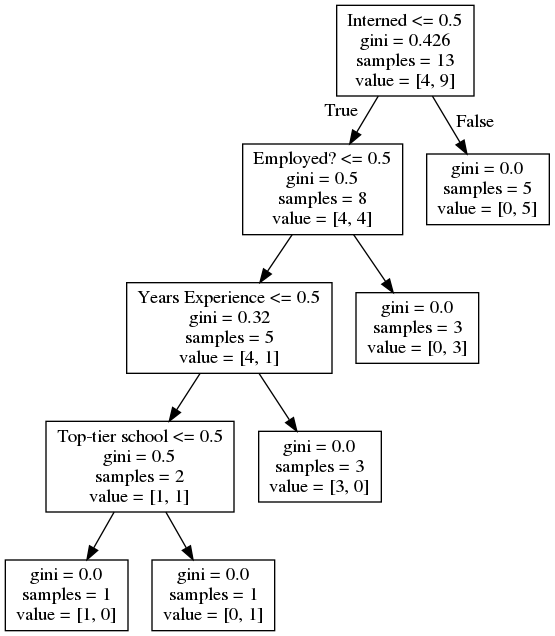

In [7]:
dot_data = StringIO()
tree.export_graphviz(classifier,out_file=dot_data,feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [8]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [9]:
classifier = rfc(n_estimators=1000)
classifier = classifier.fit(X,y)

In [10]:
#Predict employment of an employed 10-year veteran
print (classifier.predict([[10, 1, 4, 0, 0, 0]]))
#...and an unemployed 10-year veteran
print (classifier.predict([[10, 0, 4, 0, 1, 0]]))

[1]
[0]
